## Hotel Booking Project by D'Dream

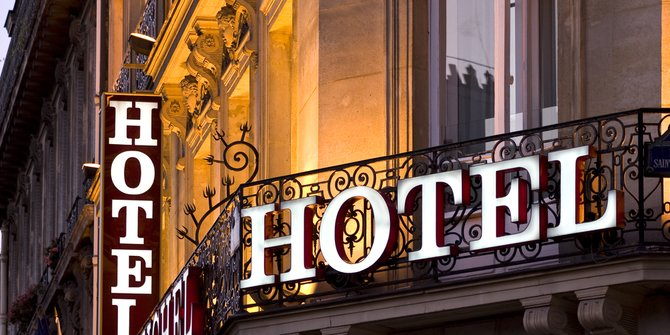

### Import Libraries

In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------


#Standard libraries for data analysis:----------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold


from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries--------------------------------------
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Set up the current working directory & Import the dataset from Github
df = pd.read_csv('https://raw.githubusercontent.com/kurnialif/dataset/main/hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
#Menampilkan 5 baris teratas dari dataset
#Displays the top 5 rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Menampilkan 5 baris terbawah dari dataset
#Display the bottom 5 rows of the dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#Menampilkan 5 baris secara acak dari dataset
#Displays 5 random rows from the dataset
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
84755,City Hotel,0,20,2017,July,27,6,0,2,1,0.0,0,BB,PRT,Direct,Direct,1,1,8,A,A,0,No Deposit,NaN,NaN,0,Transient,80.00,0,2,Check-Out,2017-07-08
18663,Resort Hotel,0,6,2017,January,3,17,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,NaN,94.0,0,Transient,35.00,0,0,Check-Out,2017-01-18
102973,City Hotel,0,259,2016,December,50,7,0,4,2,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,73.95,0,1,Check-Out,2016-12-11
97390,City Hotel,0,55,2016,September,38,11,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,89.0,NaN,0,Transient,106.24,0,0,Check-Out,2016-09-16
81317,City Hotel,0,47,2015,December,49,5,2,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,D,0,No Deposit,1.0,NaN,0,Transient-Party,62.00,0,0,Check-Out,2015-12-08


In [ ]:
#Menampilkan datatypes setiap kolom/feature
#Display datatypes for each column/feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Menampilkan count, mean, median
#Displays count, mean, median
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Menampilkan jumlah variabel data setiap kolom/feature
#Displays the number of data variables for each column/feature
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
#Menampilkan jumlah nilai kosong(null) pada setiap kolom
#Displays the number of empty (null) values ​​in each column
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Menampilkan isi dari kolom yang diinginkan
#Displays the contents of the desired column
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
#Menampilkan isi baris dari data yang diinginkan(contoh negara : Zimbabwe)
#Displays the contents of the row of the desired data (example country: Zimbabwe)
ezwe = df[df['country'] == 'ZWE']
ezwe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2905,Resort Hotel,0,15,2015,November,45,6,0,2,2,0.0,0,BB,ZWE,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,115.0,NaN,0,Transient,26.10,0,0,Check-Out,2015-11-08
33604,Resort Hotel,0,25,2017,February,8,24,1,2,2,0.0,0,HB,ZWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.0,NaN,0,Transient,65.83,0,1,Check-Out,2017-02-27
73145,City Hotel,1,215,2017,August,33,15,0,4,2,0.0,0,BB,ZWE,Direct,Direct,0,0,0,D,D,4,No Deposit,14.0,NaN,0,Transient,123.30,0,0,Canceled,2017-05-30
73460,City Hotel,1,77,2017,August,34,23,0,1,2,0.0,0,BB,ZWE,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,126.00,0,0,Canceled,2017-06-09


In [ ]:
#Mengurutkan baris secara ascending pada 2 kolom yang dipilih
#Sorts rows in ascending order on the 2 selected columns
ezwe.sort_values(by = ['arrival_date_year','lead_time'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2905,Resort Hotel,0,15,2015,November,45,6,0,2,2,0.0,0,BB,ZWE,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,115.0,NaN,0,Transient,26.10,0,0,Check-Out,2015-11-08
33604,Resort Hotel,0,25,2017,February,8,24,1,2,2,0.0,0,HB,ZWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.0,NaN,0,Transient,65.83,0,1,Check-Out,2017-02-27
73460,City Hotel,1,77,2017,August,34,23,0,1,2,0.0,0,BB,ZWE,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,126.00,0,0,Canceled,2017-06-09
73145,City Hotel,1,215,2017,August,33,15,0,4,2,0.0,0,BB,ZWE,Direct,Direct,0,0,0,D,D,4,No Deposit,14.0,NaN,0,Transient,123.30,0,0,Canceled,2017-05-30


In [ ]:
#Mengurutkan 3 baris berdasarkan nilai terbesar dari suatu kolom
#Sorts 3 rows based on the largest value in a column
ezwe.nlargest(3, 'lead_time')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
73145,City Hotel,1,215,2017,August,33,15,0,4,2,0.0,0,BB,ZWE,Direct,Direct,0,0,0,D,D,4,No Deposit,14.0,NaN,0,Transient,123.30,0,0,Canceled,2017-05-30
73460,City Hotel,1,77,2017,August,34,23,0,1,2,0.0,0,BB,ZWE,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,126.00,0,0,Canceled,2017-06-09
33604,Resort Hotel,0,25,2017,February,8,24,1,2,2,0.0,0,HB,ZWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.0,NaN,0,Transient,65.83,0,1,Check-Out,2017-02-27


In [ ]:
#tampilkan index 10 sampai dengan 20 , hanya menampilkan kolom hotel, is_canceled, lead time
#show index 10 to 20 , only show column hotel, is_canceled, lead time
df.iloc[10:21, 0:3]

,hotel,is_canceled,lead_time
10,Resort Hotel,1,23
11,Resort Hotel,0,35
12,Resort Hotel,0,68
13,Resort Hotel,0,18
14,Resort Hotel,0,37
15,Resort Hotel,0,68
16,Resort Hotel,0,37
17,Resort Hotel,0,12
18,Resort Hotel,0,0
19,Resort Hotel,0,7


In [ ]:
#tampilkan index 10 sampai dengan 20 , hanya menampilkan kolom hotel, is_canceled, lead time (berurutan)
#show index 10 to 20 , only show column hotel, is_canceled, lead time (sequentially)
df.loc[10:21, ['hotel','arrival_date_month','lead_time']]

,hotel,arrival_date_month,lead_time
10,Resort Hotel,July,23
11,Resort Hotel,July,35
12,Resort Hotel,July,68
13,Resort Hotel,July,18
14,Resort Hotel,July,37
15,Resort Hotel,July,68
16,Resort Hotel,July,37
17,Resort Hotel,July,12
18,Resort Hotel,July,0
19,Resort Hotel,July,7


In [ ]:
#Mengganti nama kolom
#Rename column
ezwe.rename(columns = {'arrival_date_year': 'year', 'arrival_date_month': 'month'})

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2905,Resort Hotel,0,15,2015,November,45,6,0,2,2,0.0,0,BB,ZWE,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,115.0,NaN,0,Transient,26.10,0,0,Check-Out,2015-11-08
33604,Resort Hotel,0,25,2017,February,8,24,1,2,2,0.0,0,HB,ZWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,241.0,NaN,0,Transient,65.83,0,1,Check-Out,2017-02-27
73145,City Hotel,1,215,2017,August,33,15,0,4,2,0.0,0,BB,ZWE,Direct,Direct,0,0,0,D,D,4,No Deposit,14.0,NaN,0,Transient,123.30,0,0,Canceled,2017-05-30
73460,City Hotel,1,77,2017,August,34,23,0,1,2,0.0,0,BB,ZWE,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,126.00,0,0,Canceled,2017-06-09


In [ ]:
#Mengelompokan kolom berdasarkan nilai tengah terhadap kolom adr
#Group columns based on the median value of the adr column
df.groupby('hotel').agg('mean').sort_values(by= 'adr', ascending = False)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,,
City Hotel,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,28.144721,145.271618,3.226774,105.304465,0.024367,0.546918
Resort Hotel,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,217.571725,241.486165,0.527758,94.952930,0.138068,0.619770


In [ ]:
#Mengelompokan kolom berdasarkan hotel dan mencari nilai rata-rata terhadap nilai adr
#Group the column by hotel and find the average value against the adr value
df.groupby('hotel').agg(average_adr = ('adr', 'mean'), \
                        max_price = ('adr', 'max'))

,average_adr,max_price
hotel,,
City Hotel,105.304465,5400.0
Resort Hotel,94.952930,508.0


In [ ]:
# `reservation_status` vs `is_canceled` table

pd.crosstab(columns = df['is_canceled'], index = df['reservation_status'],
           margins=True, margins_name = 'Total')

is_canceled,0,1,Total
reservation_status,,,
Canceled,0,43017,43017
Check-Out,75166,0,75166
No-Show,0,1207,1207
Total,75166,44224,119390


In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<a id='wrangling'></a>
## Data Wrangling / Data Preprocessing

In [ ]:
#Menampilkan baris-baris yang mempunyai nilai sama
#EngVer: Drop Duplicated data
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [ ]:
#Menghapus data-data yang mempunyai nilai sama
#EngVer: Drop Duplicated data
df.drop_duplicates(inplace=True)

In [ ]:
#Informasi data
#EngVer: Informations of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
#Jumlah nilai nol untuk setiap kolom
#Number of null values for each column
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
# terlalu banyak nilai yang hilang di kolom perusahaan & agen. Jadi kita hilangkan
# too many missing values in company column & agent. So we will drop it
df.drop('company', axis=1, inplace=True)
df.drop('agent', axis=1, inplace=True)

In [ ]:
#Menampilkan isi dari kolom yang diinginkan
#EngVer: the contents of the desired column
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
#Karena negara adalah kategori jadi kami akan menggunakan mode untuk mengisi NaN
#EngVer: Because country is a categorical so we will use mode to fill the NaN
df["country"].fillna(df["country"].mode()[0],inplace=True)

In [ ]:
#Undefined/SC – tanpa paket makan
#EngVer: Undefined/SC – no meal package
df["meal"].replace("Undefined", "SC", inplace=True)

In [ ]:
df["children"].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [ ]:
#Mengurutkan nilai pada kolom "children"
#Sort the values ​​in the "children" column
df.sort_values('children',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,0,Contract,133.16,0,1,No-Show,2015-07-12
93710,City Hotel,0,99,2016,July,30,22,1,2,2,3.0,0,BB,DNK,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,269.30,0,2,Check-Out,2016-07-25
70930,City Hotel,1,109,2017,June,26,25,2,1,2,3.0,0,BB,CN,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,255.00,0,3,Canceled,2017-04-03
116150,City Hotel,0,51,2017,July,28,11,0,4,2,3.0,0,BB,MEX,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,321.50,0,1,Check-Out,2017-07-15
25824,Resort Hotel,0,22,2016,August,36,31,2,4,2,3.0,0,HB,PRT,Online TA,TA/TO,1,0,1,G,G,1,No Deposit,0,Transient,311.33,1,2,Check-Out,2016-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.00,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.00,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,18.00,0,2,Canceled,2015-08-04


In [ ]:
#Menghapus data tidak logis
#drop irrational data
df.drop(328, axis=0, inplace=True)

In [ ]:
df["babies"].value_counts()

0     86481
1       897
2        15
10        1
9         1
Name: babies, dtype: int64

In [ ]:
df.sort_values('babies',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14
104351,City Hotel,0,19,2017,January,2,8,2,2,2,0.0,2,BB,PRT,Direct,Direct,0,0,0,E,E,1,No Deposit,0,Transient,119.50,0,0,Check-Out,2017-01-12
37302,Resort Hotel,0,1,2017,June,24,11,2,0,2,0.0,2,HB,PRT,Online TA,TA/TO,0,0,0,A,C,1,No Deposit,0,Transient,201.00,1,1,Check-Out,2017-06-13
84429,City Hotel,0,1,2016,February,9,25,0,1,2,1.0,2,BB,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,0,Transient,227.00,0,3,Check-Out,2016-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35146,Resort Hotel,0,0,2017,April,15,13,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,0,Transient,105.00,0,0,Check-Out,2017-04-14
35145,Resort Hotel,0,28,2017,April,15,9,2,3,2,2.0,0,BB,RUS,Online TA,TA/TO,0,0,0,C,F,0,No Deposit,0,Transient,158.00,1,0,Check-Out,2017-04-14
35144,Resort Hotel,0,68,2017,April,15,13,0,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,85.00,0,2,Check-Out,2017-04-14
35143,Resort Hotel,0,10,2017,April,15,9,2,3,1,0.0,0,HB,KAZ,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,102.00,0,0,Check-Out,2017-04-14


In [ ]:
#drop irrational data
df.drop([46619,78656], axis=0, inplace=True)

In [ ]:
#Pada kolom "children" bertipe float, jadi kita ubah menjadi integer dan mengisi data yang kosong
#Children is float so we need to convert it to int and fill missing data by zero
df["children"]=df["children"].fillna(0.0).astype(int)

In [ ]:
#Mengubah kolom reservation_status_date menjadi ke format tanggal
#convert reservation status date to date format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y/%m/%d', errors='coerce')

In [ ]:
df["adr"].value_counts(ascending=False)

0.00      1778
75.00     1320
65.00     1260
48.00      878
85.00      858
          ... 
31.60        1
55.11        1
33.65        1
31.41        1
157.71       1
Name: adr, Length: 8878, dtype: int64

In [ ]:
adr_index =pd.DataFrame(df.loc[df['adr'] == 0.00]).index

In [ ]:
#Mengilangkan nilai kosong di kolom "adr"
#Drop Zeros in adr
df.drop(adr_index, axis=0, inplace=True)

In [ ]:
df["distribution_channel"].value_counts()

TA/TO        68302
Direct       12226
Corporate     4905
GDS            177
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
distribution_channel_index = df.loc[df['distribution_channel'] == "Undefined"].index

In [ ]:
#Menghapus undefined pada kolom "Distribution Channel"
#Drop undefined Distribution Channel
df.drop(distribution_channel_index, axis=0, inplace=True)

In [ ]:
df["reservation_status"].value_counts()

Check-Out    61775
Canceled     22847
No-Show        988
Name: reservation_status, dtype: int64

In [ ]:
#Mengubah data "No-Show" ke "Canceled" pada kolom reservation_date
#EngVer: Change the "No-Show" data to "Canceled" in the reservation_date column
df["reservation_status"].replace("No-Show", "Canceled", inplace=True)

In [ ]:
df.sort_values('adults',ascending = False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
7966,Resort Hotel,0,320,2016,September,37,5,1,2,4,0,0,BB,GBR,Direct,Direct,0,0,0,H,H,0,No Deposit,0,Transient,161.75,0,0,Check-Out,2016-09-08
116395,City Hotel,0,84,2017,July,29,16,2,1,4,0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient,234.00,0,3,Check-Out,2017-07-19
12083,Resort Hotel,1,19,2017,June,24,12,1,4,4,0,0,BB,PRT,Direct,Direct,0,0,0,H,H,0,No Deposit,0,Transient,260.00,0,0,Canceled,2017-05-31
114656,City Hotel,0,112,2017,June,25,21,0,4,4,0,0,BB,GBR,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,233.00,0,2,Check-Out,2017-06-25
27351,Resort Hotel,0,0,2016,August,35,26,0,1,4,0,0,BB,ESP,Direct,Direct,0,0,0,H,H,0,No Deposit,0,Transient,261.00,1,0,Check-Out,2016-08-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102938,City Hotel,0,56,2016,December,50,7,0,3,0,2,0,BB,ITA,Online TA,TA/TO,0,0,0,B,A,1,No Deposit,0,Transient,82.44,0,1,Check-Out,2016-12-10
102949,City Hotel,0,61,2016,December,50,8,0,2,0,2,0,BB,PRT,Online TA,TA/TO,0,0,0,B,B,0,No Deposit,0,Transient-Party,91.60,0,0,Check-Out,2016-12-10
100380,City Hotel,0,208,2016,October,44,23,2,2,0,2,0,BB,GBR,Online TA,TA/TO,0,0,0,B,B,3,No Deposit,0,Transient-Party,88.77,0,2,Check-Out,2016-10-27
61933,City Hotel,1,251,2016,December,53,28,2,9,0,2,0,BB,CHE,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,0,Transient,74.29,0,2,Canceled,2016-10-13


In [ ]:
adult_index = df.loc[df['adults'] < 1].index
adult_index

Int64Index([ 31765,  40984,  41048,  41446,  45158,  46132,  46150,  46186,
             46196,  46220,
            ...
            116251, 116534, 116558, 117128, 117130, 117204, 117274, 117303,
            117453, 118200],
           dtype='int64', length=244)

In [ ]:
df.drop(adult_index , axis=0,inplace = True)

In [ ]:
df["required_car_parking_spaces"].value_counts()

0    78163
1     7170
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

In [ ]:
df.sort_values("required_car_parking_spaces",ascending=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,No Deposit,0,Transient-Party,40.00,8,1,Check-Out,2017-03-19
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,122,Transient-Party,80.00,8,0,Check-Out,2017-03-23
38117,Resort Hotel,0,205,2017,June,26,26,3,10,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,0,Transient,111.00,3,0,Check-Out,2017-07-09
110812,City Hotel,0,30,2017,April,17,29,2,1,2,0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,153.33,3,2,Check-Out,2017-05-02
102762,City Hotel,0,13,2016,December,50,5,1,0,1,0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.00,3,0,Check-Out,2016-12-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38421,Resort Hotel,0,3,2017,July,28,14,1,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,170.00,0,2,Check-Out,2017-07-17
38420,Resort Hotel,0,110,2017,July,28,10,2,5,2,0,0,BB,BRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,200.00,0,1,Check-Out,2017-07-17
38419,Resort Hotel,0,46,2017,July,28,13,1,3,2,2,0,BB,SWE,Online TA,TA/TO,0,0,0,H,H,1,No Deposit,0,Transient,285.00,0,0,Check-Out,2017-07-17
38418,Resort Hotel,0,33,2017,July,29,17,1,5,2,2,0,BB,BEL,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,292.50,0,1,Check-Out,2017-07-23


In [ ]:
df.drop([29045,29046],axis=0,inplace=True)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000,85364.000000
mean,0.278291,80.611581,2016.215688,26.799154,15.822302,1.017092,2.652840,1.886076,0.135233,0.010531,0.034195,0.029017,0.169123,0.265030,0.742198,108.631058,0.084755,0.699171
std,0.448160,85.883506,0.684626,13.633852,8.837098,1.026516,2.032568,0.493400,0.447348,0.103788,0.181730,0.365267,1.677686,0.702206,10.005038,53.398313,0.280070,0.830622
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.500000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000
75%,1.000000,126.000000,2017.000000,37.000000,23.250000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,2.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,3.000000,5.000000


In [ ]:
#Mengetahui jumlah nilai kosong(null) pada setiap kolom
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


Pada tahap data pre-processing ini, beberapa baris yang menunjukan nilai sama dihapus dari dataframe.  Beberapa kolom yang memilikin missing values seperti pada kolom company dan agent, kita hapus dari dataframe ini. Lalu pada kolom country terdapat beberpa missing value, sehingga kita menggunakan mode untuk mengisi data yang hilang. Beberapa data yang mempunyai data yang tidak logis/irrational data juga kita hapus dari dataframe ini.

English Version:
At this data pre-processing stage, several rows showing the same value are deleted from the dataframe. We delete some columns that have missing values, such as the company and agent columns, from this dataframe. Then in the country column there are several missing values, so we use the mode to fill in the missing data. We also delete some data that has illogical/irrational data from this dataframe.

<a id='feature'></a>
## Feature Engineering

In [ ]:
#Mengumpulkan tanggal kedatangan dalam satu kolom
#EngVer: collect arrival date in one column
df['arrival_date'] = df[["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]].apply(lambda x: '/'.join(x.dropna().astype(str)),axis=1)

In [ ]:
#convert arrival date to date format
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y/%B/%d', errors='coerce')

In [ ]:
#Total Guests
df["Total_Guests"]=df["adults"]+df["children"]

In [ ]:
df["Total_Guests"].value_counts()

2    56797
1    15328
3     9431
4     3708
5      100
Name: Total_Guests, dtype: int64

In [ ]:
#function for seasons
def season(x):
    if x in ['December','January','February']:
        return "Winter"
    if x in['March','April','May']:
        return "Spring"
    if x in['June','July', 'August']:
        return "Summer"
    if x in['September', 'October', 'November']:
        return "Autum"

In [ ]:
#New column of seasons
df['Seasons']=df['arrival_date_month'].apply(season)

In [ ]:
#Create new column named Total Days
df["Total_Days"]=df["stays_in_weekend_nights"]+df["stays_in_week_nights"]

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Total_Guests,Seasons,Total_Days
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,Summer,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,Summer,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,Summer,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07-01,2,Summer,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01,2,Summer,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,2,Summer,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,3,Summer,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,2,Summer,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,2,Summer,7


<a id='EDA'></a>
## Exploratory Data Analysis (EDA)

### Berapakah presentase pengunjung city hotel dengan resort hotel?
### EngVer: What is the percentage of city hotel visitors to resort hotels?

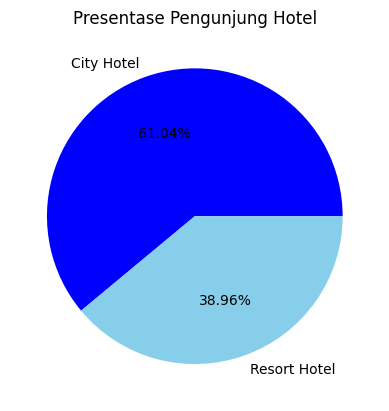

In [ ]:
#Melihat presentase pengunjung berdasarkan jenis hotel
plt.title('Presentase Pengunjung Hotel')
colors = ['blue', 'SkyBlue']  # Daftar warna yang akan digunakan untuk masing-masing bagian diagram
plt.pie(df['hotel'].value_counts(), labels=df['hotel'].value_counts().index, autopct='%1.2f%%', textprops={'color': 'black'}, colors=colors)
plt.show()

Berdasarkan grafik di bawah ini, sekitar 38.96% data dipesan untuk hotel resort dan sisanya dipesan untuk City Hotel.

EngVer: According to the above graph, approximately 38.96% of the data was booked for resort hotel and the rest of was booked for City Hotel.

### Dari negara manakah tamu paling banyak berasal?
### What is The most countries the guests came from ?

In [ ]:
# dapatkan jumlah tamu aktual berdasarkan negara
# EngVer: get number of acutal guests by country
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
# show on map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"],
                    hover_name=country_data.index,
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

In [ ]:
#From where the most guests are coming ?.
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,16776
1,GBR,8365
2,FRA,7035
3,ESP,5310
4,DEU,4303
...,...,...
160,TZA,1
161,BHR,1
162,NAM,1
163,SYC,1


Berdasarkan grafik tersebut, pengunjung hotel terbanyak ada di negara Portugal (PRT) 27.2%, United Kingdom (GBR) 13.6%, perancis (FRA) 11.4%.

Based on this graph, the most hotel visitors are in Portugal (PRT) 27.2%, United Kingdom (GBR) 13.6%, France (FRA) 11.4%.

### Perbandingan tarif rata-rata harian antara tipe kamar yang dipesan dan jenis hotel
### ADR comparison between reserved_room_type and the type of hotel



In [ ]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

### Perbandingan beberapa variabel terkait pembatalan reservasi hotel
### Comparison of several variables related to hotel reservation cancellations

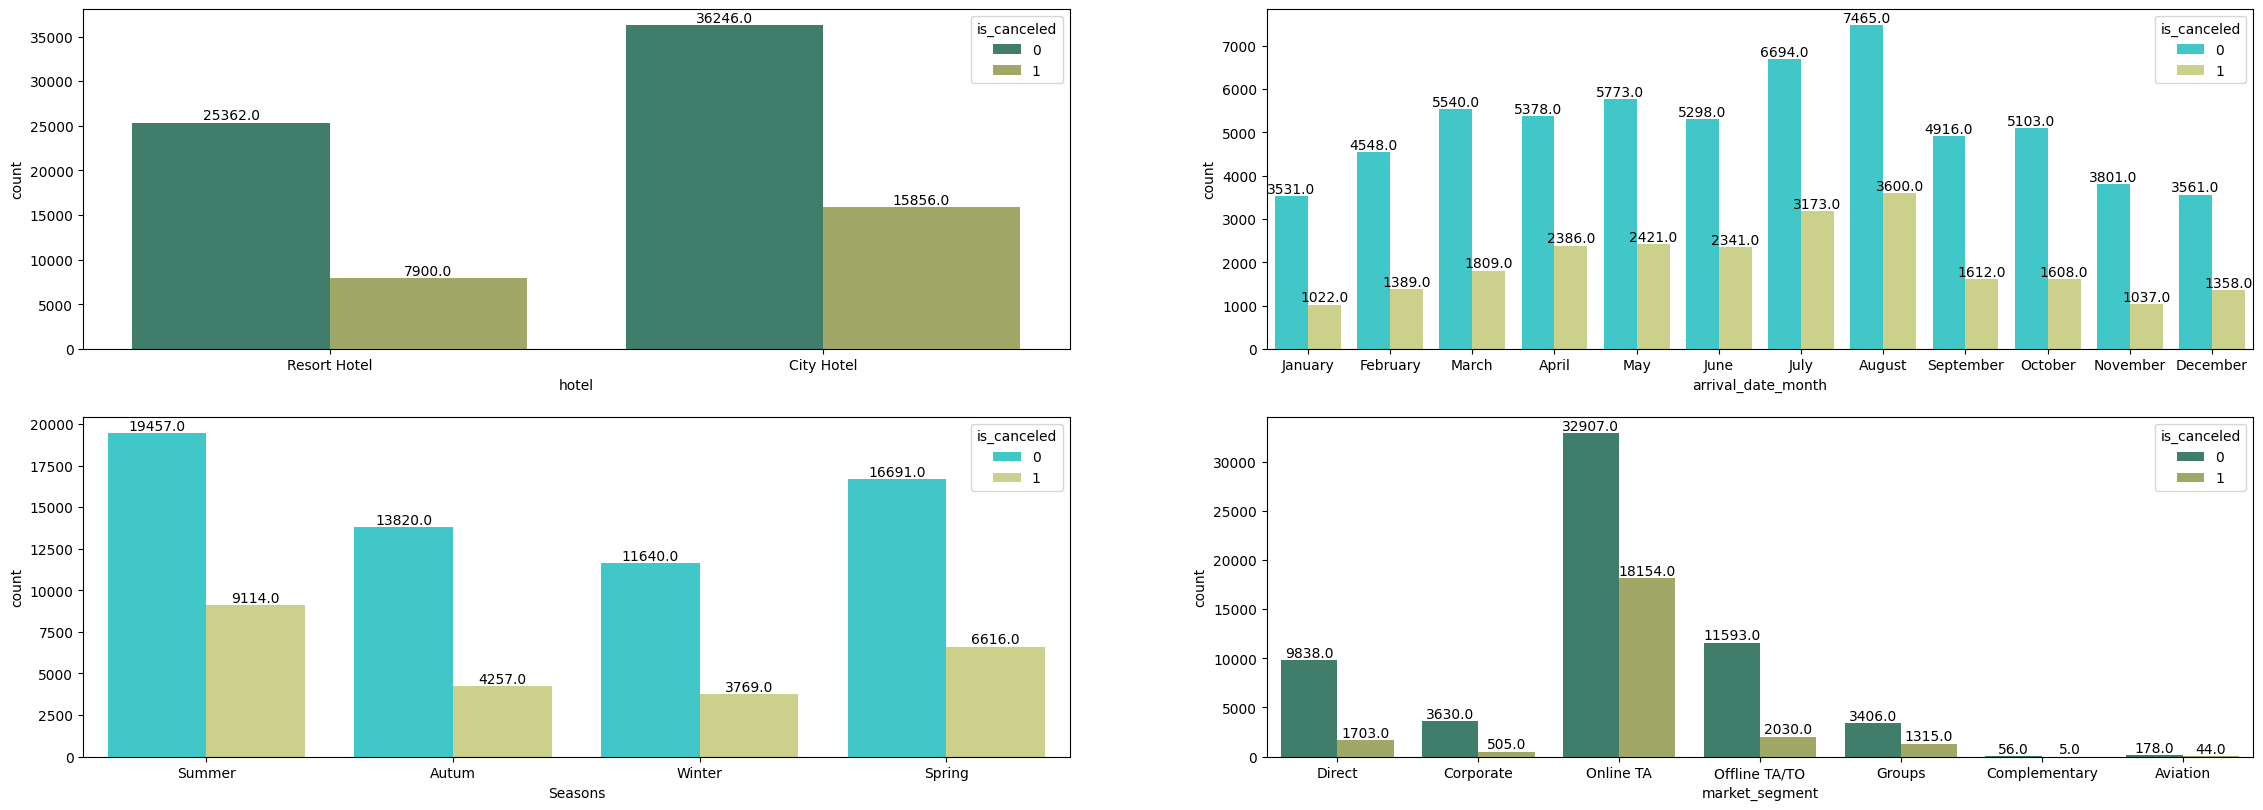

In [ ]:
fig=plt.figure(figsize=(28,15))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
sns.countplot(x='hotel',data=df,ax=ax[0],hue='is_canceled',palette='gist_earth')
sns.countplot(x='arrival_date_month',data=df,ax=ax[1],hue='is_canceled',palette='rainbow',order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sns.countplot(x='Seasons',data=df,ax=ax[2],hue='is_canceled',palette='rainbow')
sns.countplot(x='market_segment',data=df,ax=ax[3],hue='is_canceled',palette='gist_earth')

for i in range(4):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Pada grafik diatas dapat dilihat perbandingan antara stats reservasi dibatalkan dengan yang tidak. Total pembatalan terbanyak ada di city hotel dengan total 15856. Lalu pada bulan kedatangan, pembatalan terbanyak ada dibulan Agustus dan berdasarkan jenis musim, pembatalan terbanyak ada di musim panas 9114. Sedangkan berdasarkan segment pasar di mana reservasi dibuat, pembatalan terbanyak ada di Online TA (Travel Agent Online).

**English Version:**
In the graph above you can see a comparison between the reservation stats that were canceled and those that weren't. The highest total cancellations were in city hotels with a total of 15,856. Then in the month of arrival, the most cancellations were in August and based on the type of season, the most cancellations were in summer 9,114. Meanwhile, based on the market segment where reservations were made, the most cancellations were on Online TA ( Online Travel Agents).

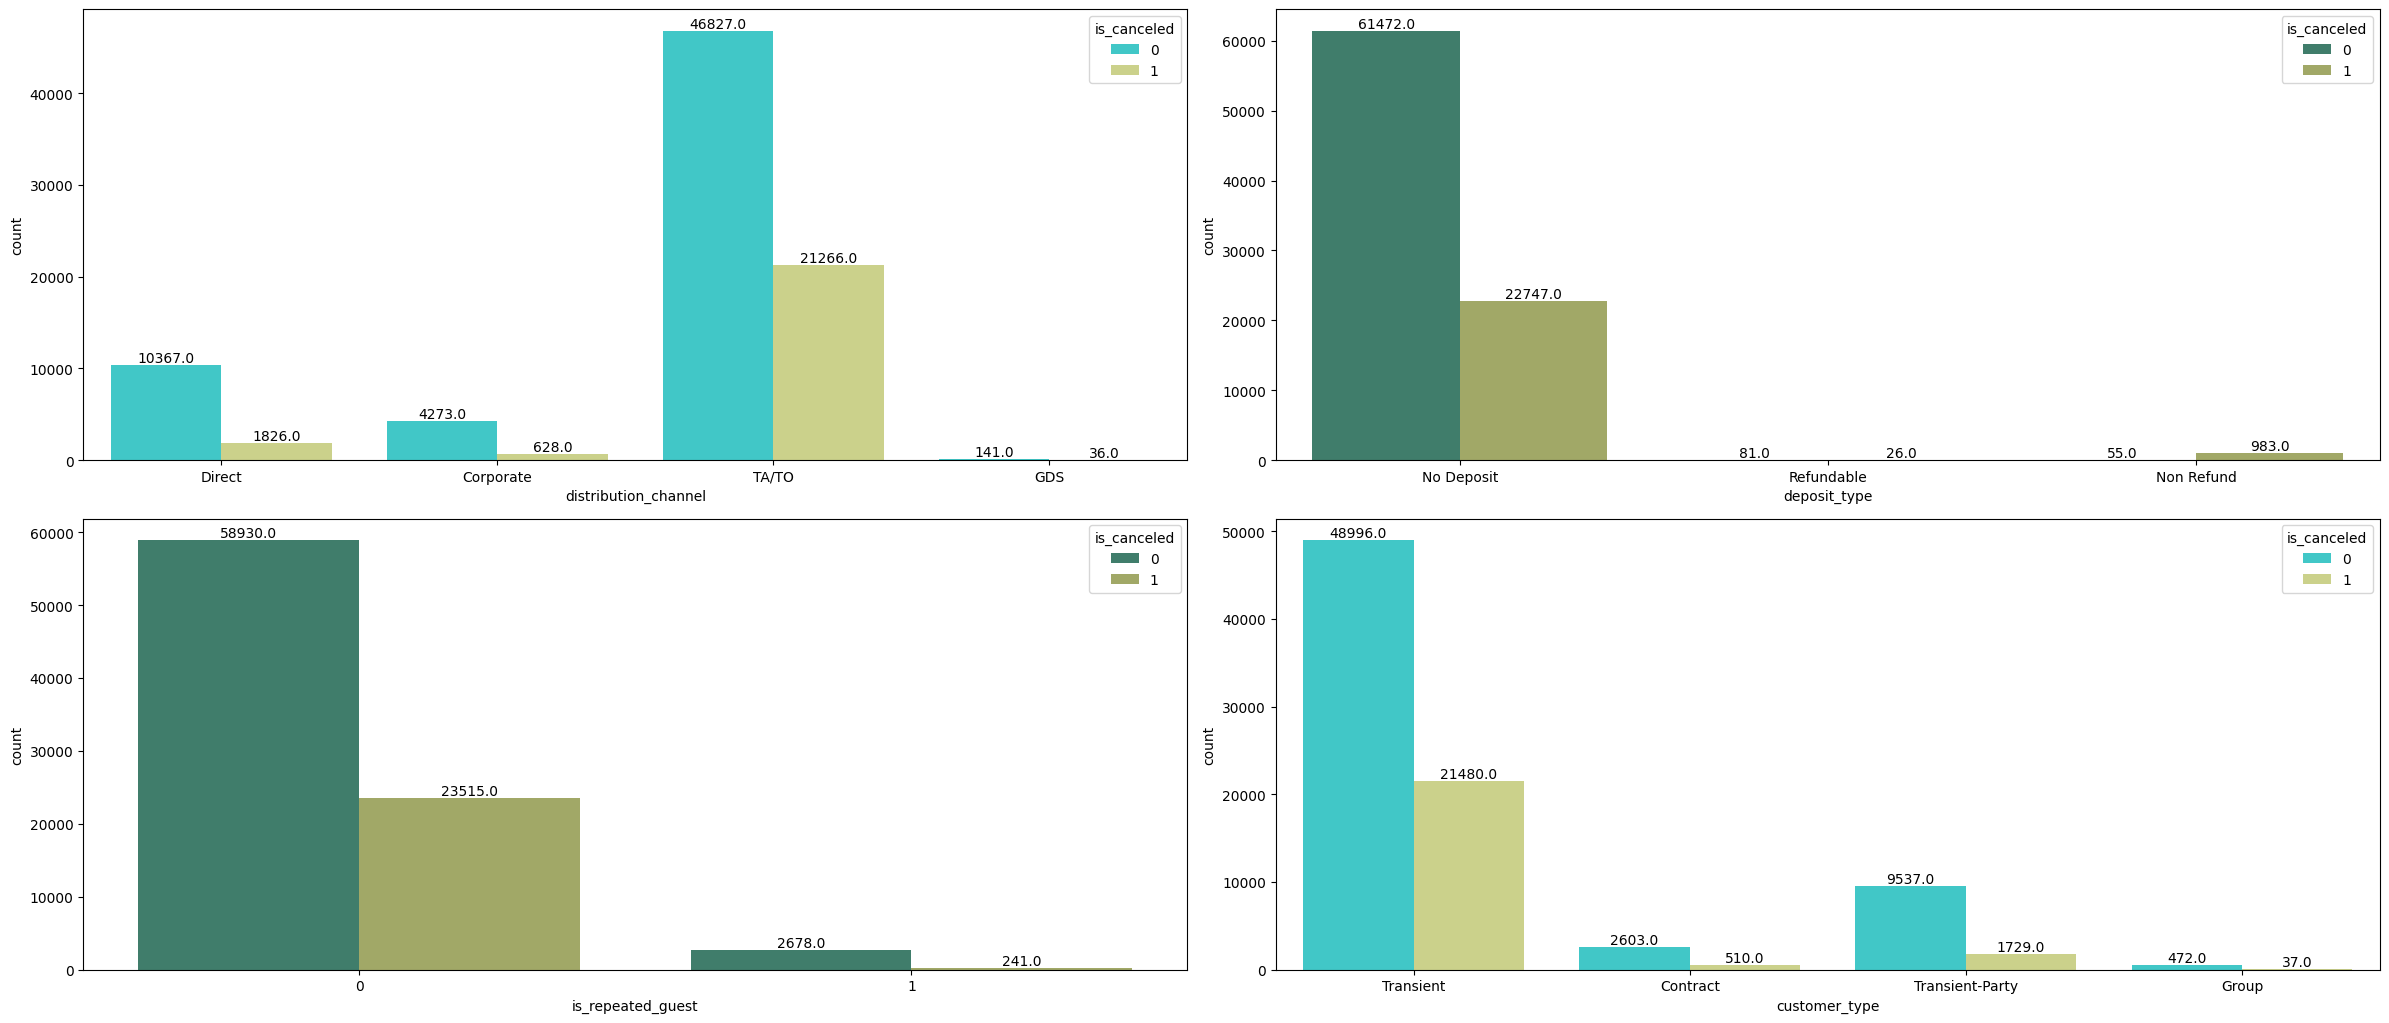

In [ ]:
fig=plt.figure(figsize=(24,15))
ax=[None for _ in range(4)]
ax[0]=plt.subplot2grid((3,2),(0,0))
ax[1]=plt.subplot2grid((3,2),(0,1))
ax[2]=plt.subplot2grid((3,2),(1,0))
ax[3]=plt.subplot2grid((3,2),(1,1))
sns.countplot(x='distribution_channel',data=df,ax=ax[0],hue='is_canceled',palette='rainbow')
sns.countplot(x='deposit_type',data=df,ax=ax[1],hue='is_canceled',palette='gist_earth')
sns.countplot(x='is_repeated_guest',data=df,ax=ax[2],hue='is_canceled',palette='gist_earth')
sns.countplot(x='customer_type',data=df,ax=ax[3],hue='is_canceled',palette='rainbow')

# Adding values to each bar
for i in range(4):
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Berdasarkan Saluran distribusi yang digunakan untuk memesan, pembatalan terbanyak ada di TA/TO (Agen Perjalanan / Tur Operator) dengan total 21266. Lalu berdasarkan jenis deposit yang dibayarkan, pembatalan terbanyak ada di No Deposit. Sedangkan dilihat dari jenis tamu apakah tamu berulang atau bukan, pembatalan terbanyak di tamu baru.

**English Version:**
Based on the distribution channel used to order, the most cancellations were at TA/TO (Travel Agents / Tour Operators) with a total of 21266. Then based on the type of deposit paid, the most cancellations were at No Deposit. Meanwhile, judging from the type of guests whether repeat guests or not, the most cancellations are from new guests.

### Perbandingan antara Arrival Year vs Lead Time vs Canceled Situation
### Comparison between Arrival Year vs Lead Time vs Canceled Situation

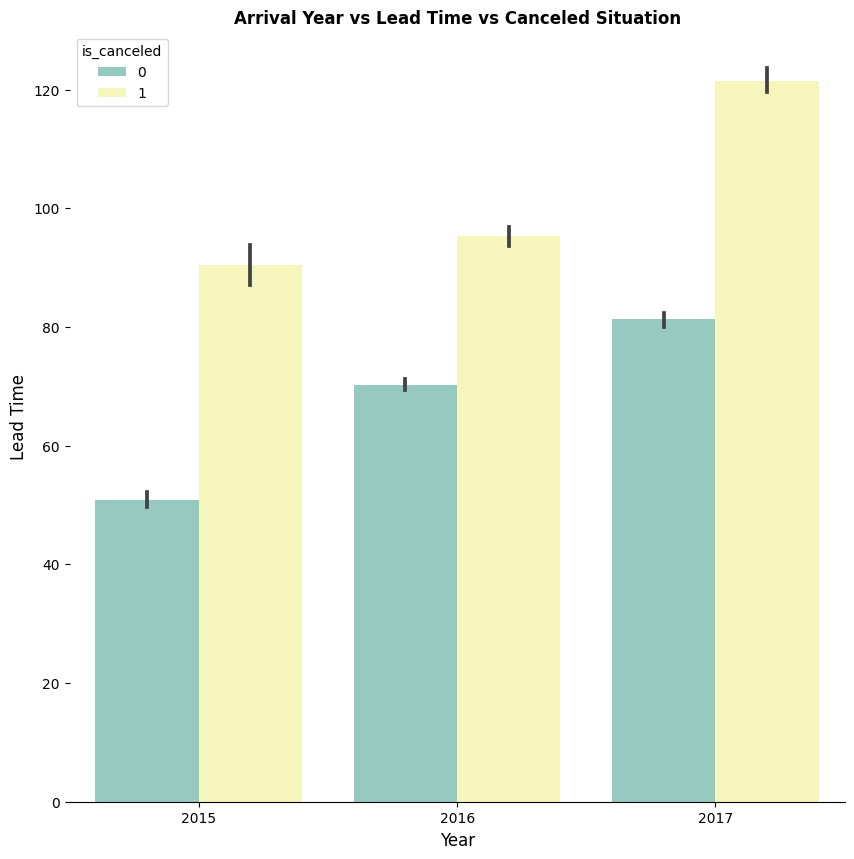

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x='arrival_date_year', y='lead_time', hue="is_canceled", data=df, palette="Set3")
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)
plt.show()

Pada grafik tersebut ada peningkatan dari tahun ke tahun terkait pembatalan reservasi hotel jika dilihat berdasarkan Lead Time. Dimana jika jarak antara tanggal pemesanan dan tanggal kedatangan semakin tinggi, akan lebih banyak pembatalan reservasi hotel.

**English Version:**
In this graph there is an increase from year to year regarding hotel reservation cancellations when viewed based on Lead Time. Where if the distance between the booking date and the arrival date is higher, there will be more hotel reservation cancellations.

In [ ]:
#Table of `stay_in_weekend` and `stay_in_week_nights` features

pd.crosstab(index = df['stays_in_week_nights'],columns=df['stays_in_weekend_nights'], margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,16,18,19,Total
stays_in_week_nights,,,,,,,,,,,,,,,,,
0,0,3869,1531,0,0,0,0,0,0,0,0,0,0,0,0,0,5400
1,12789,4496,4348,0,0,0,0,0,0,0,0,0,0,0,0,0,21633
2,9363,5933,5094,0,0,0,0,0,0,0,0,0,0,0,0,0,20390
3,7373,4897,3839,0,0,0,0,0,0,0,0,0,0,0,0,0,16109
4,3465,2129,2206,0,0,0,0,0,0,0,0,0,0,0,0,0,7800
5,719,1033,7484,279,87,0,0,0,0,0,0,0,0,0,0,0,9602
6,0,0,773,261,330,0,0,0,0,0,0,0,0,0,0,0,1364
7,0,0,422,369,166,0,0,0,0,0,0,0,0,0,0,0,957
8,0,0,371,122,115,0,0,0,0,0,0,0,0,0,0,0,608


### Perbandingan Arrival Month vs ADR vs Booking Cancellation Status
### Comparison of Arrival Month vs ADR vs Booking Cancellation Status

Text(0, 0.5, 'ADR')

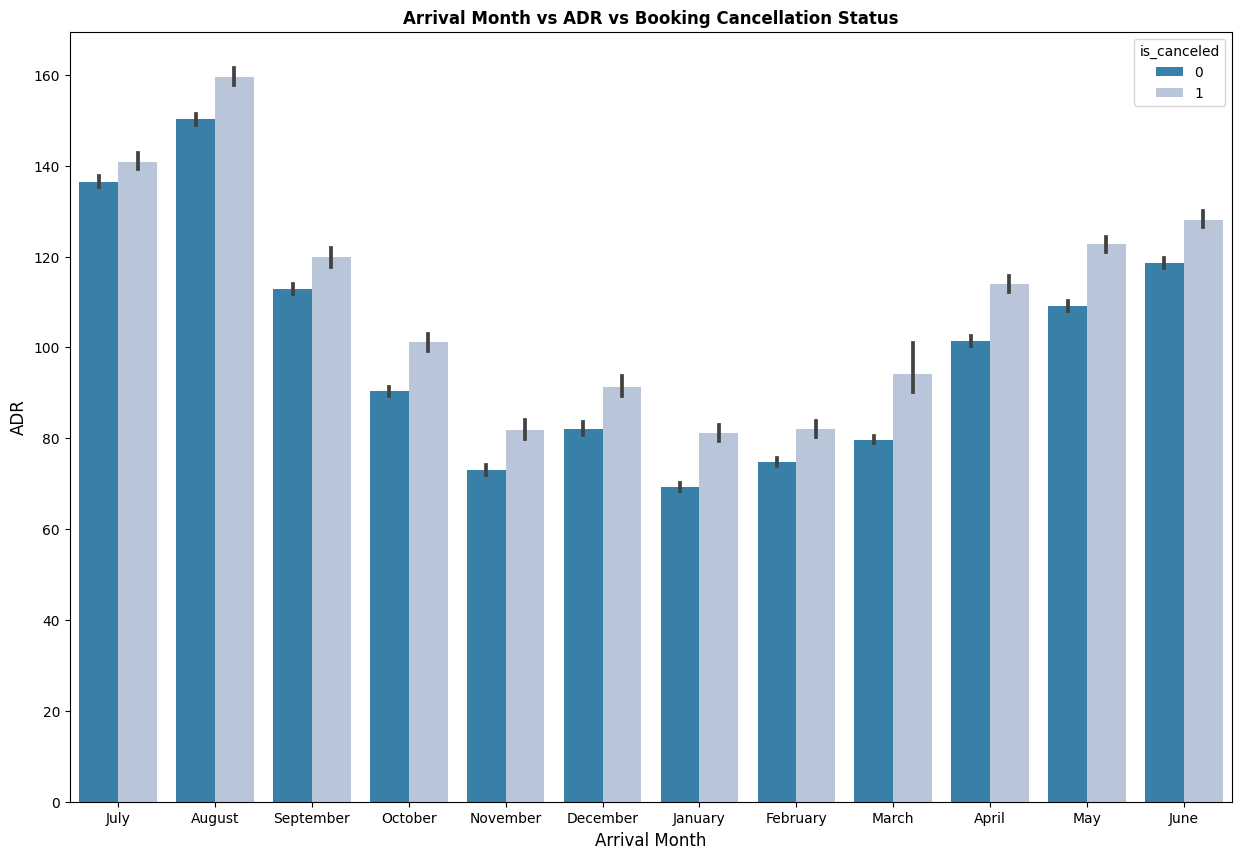

In [ ]:
# `Arrival Month` vs `ADR` vs `Booking Cancellation Status`

df['adr'] = df['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=df)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

Analisis eksplorasi lainnya dibuat untuk mendalami hubungan antara ADR dan bulan kedatangan dan status pembatalan pemesanan. Seperti yang sudah dijelaskan pada grafik bulan kedatangan sebelumnya, Agustus adalah bulan pemesanan yang paling intens. Selain itu, Arrival Daily Rate tertinggi juga terjadi di bulan tersebut. Kecuali untuk bulan-bulan sibuk seperti Agustus, Juli, dan September, pemesanan yang dibatalkan memiliki ADR yang lebih tinggi daripada pemesanan yang tidak dibatalkan. Mungkin tarif tertinggi ini bisa menjadi salah satu alasan pembatalan pemesanan.

**English Version:**
Another exploratory analysis made for diving deep into the relationship between ADR and arrival month and booking cancellation status. As explained in the previous graph of arrival month, August is the most intense month of bookings. Besides the highest Arrival Daily Rate has ben occurred in that month too. Except for rush months like August, July, and September, canceled bookings have higher ADR than not canceled bookings. Maybe this highest rate could be one of the reasons for canceled bookings.

### Korelasi antar feature
### Correlation between features

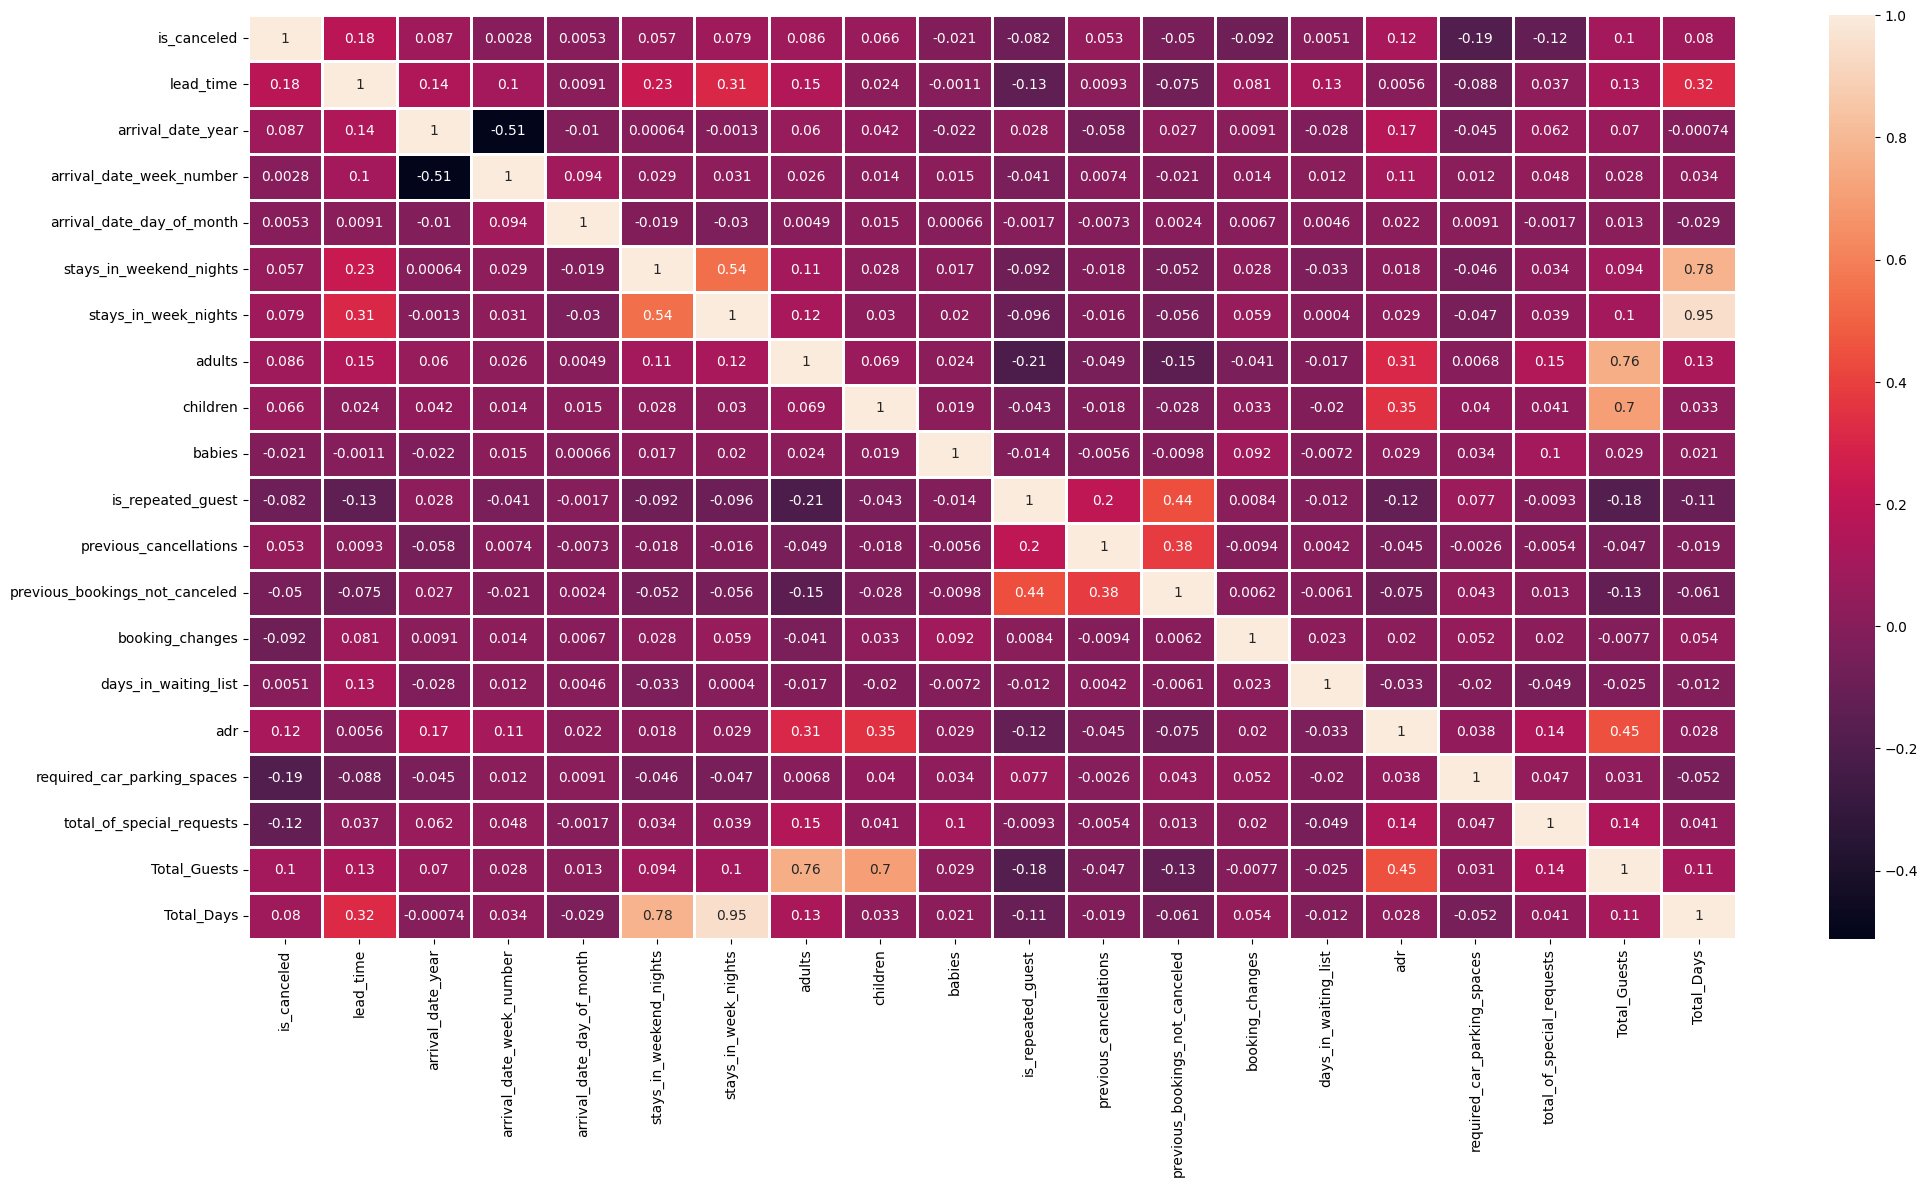

In [ ]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
required_car_parking_spaces       0.187918
lead_time                         0.182537
total_of_special_requests         0.122748
adr                               0.118322
Total_Guests                      0.104794
booking_changes                   0.092282
arrival_date_year                 0.087171
adults                            0.086057
is_repeated_guest                 0.082178
Total_Days                        0.080252
stays_in_week_nights              0.079183
children                          0.066345
stays_in_weekend_nights           0.056708
previous_cancellations            0.053291
previous_bookings_not_canceled    0.050103
babies                            0.021202
arrival_date_day_of_month         0.005302
days_in_waiting_list              0.005103
arrival_date_week_number          0.002773
Name: is_canceled, dtype: float64

In [ ]:
#Mengetahui jumlah nilai kosong(null) pada setiap kolom
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Total_Guests,Seasons,Total_Days
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,Summer,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,Summer,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,Summer,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07-01,2,Summer,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01,2,Summer,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,2,Summer,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,3,Summer,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,2,Summer,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,2,Summer,7


<a id='Modeling'></a>
# Modeling

In [ ]:
df['reservation_status'] = df['reservation_status'].astype('category')
y = df['reservation_status'].cat.codes
y_names = list(df['reservation_status'].cat.categories)
X = df.drop(columns=['reservation_status'])

### Feature Selection

In [ ]:
X.drop(["country","is_canceled",'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month',"meal","assigned_room_type","adr","required_car_parking_spaces","reservation_status_date","adults","children","babies","days_in_waiting_list","arrival_date","Total_Days"],axis=1,inplace=True)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Logistic Regression

In [ ]:
start_time = datetime.now()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
print("Training Report:")
print(classification_report(lr.predict(x_train_scaled),y_train))
print("Testing Report:")
print(classification_report(y_pred,y_test))
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

Training Report:
              precision    recall  f1-score   support

           0       0.34      0.69      0.45      9212
           1       0.94      0.79      0.86     59079

    accuracy                           0.77     68291
   macro avg       0.64      0.74      0.66     68291
weighted avg       0.86      0.77      0.80     68291

Testing Report:
              precision    recall  f1-score   support

           0       0.34      0.69      0.45      2338
           1       0.94      0.79      0.86     14735

    accuracy                           0.77     17073
   macro avg       0.64      0.74      0.66     17073
weighted avg       0.86      0.77      0.80     17073

0:00:01.218574


### KNN

In [ ]:
start_time = datetime.now()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)
print("Training Report:")
print(classification_report(knn.predict(x_train_scaled),y_train))
print("Testing Report:")
print(classification_report(y_pred,y_test))
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

Training Report:
              precision    recall  f1-score   support

           0       0.58      0.76      0.66     14626
           1       0.93      0.85      0.89     53665

    accuracy                           0.83     68291
   macro avg       0.75      0.80      0.77     68291
weighted avg       0.85      0.83      0.84     68291

Testing Report:
              precision    recall  f1-score   support

           0       0.45      0.61      0.52      3492
           1       0.89      0.81      0.85     13581

    accuracy                           0.77     17073
   macro avg       0.67      0.71      0.68     17073
weighted avg       0.80      0.77      0.78     17073

0:00:35.454215


### Naive Bayes

In [ ]:
start_time = datetime.now()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train)
y_pred = nb.predict(x_test_scaled)
print("Training Report:")
print(classification_report(nb.predict(x_train_scaled),y_train))
print("Testing Report:")
print(classification_report(y_pred,y_test))
print(datetime.now())
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

Training Report:
              precision    recall  f1-score   support

           0       0.79      0.39      0.52     38548
           1       0.52      0.87      0.65     29743

    accuracy                           0.60     68291
   macro avg       0.66      0.63      0.59     68291
weighted avg       0.67      0.60      0.58     68291

Testing Report:
              precision    recall  f1-score   support

           0       0.79      0.39      0.52      9614
           1       0.52      0.86      0.65      7459

    accuracy                           0.60     17073
   macro avg       0.65      0.63      0.59     17073
weighted avg       0.67      0.60      0.58     17073

2023-06-13 05:20:31.800425
0:00:00.445726


### Decision Tree

In [ ]:
start_time = datetime.now()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)
y_pred = dt.predict(x_test_scaled)
print("Training Report:")
print(classification_report(dt.predict(x_train_scaled),y_train))
print("Testing Report:")
print(classification_report(y_pred,y_test))
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

Training Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     19754
           1       0.97      0.99      0.98     48537

    accuracy                           0.97     68291
   macro avg       0.97      0.96      0.96     68291
weighted avg       0.97      0.97      0.97     68291

Testing Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.51      5011
           1       0.80      0.81      0.80     12062

    accuracy                           0.72     17073
   macro avg       0.66      0.66      0.66     17073
weighted avg       0.72      0.72      0.72     17073

0:00:00.621214


### Random Forest

In [ ]:
start_time = datetime.now()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)
print("Training Report:")
print(classification_report(rf.predict(x_train_scaled),y_train))
print("Testing Report:")
print(classification_report(y_pred,y_test))
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

Training Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     18183
           1       0.99      0.97      0.98     50108

    accuracy                           0.97     68291
   macro avg       0.96      0.97      0.96     68291
weighted avg       0.97      0.97      0.97     68291

Testing Report:
              precision    recall  f1-score   support

           0       0.48      0.61      0.54      3776
           1       0.88      0.82      0.85     13297

    accuracy                           0.77     17073
   macro avg       0.68      0.71      0.69     17073
weighted avg       0.79      0.77      0.78     17073

0:00:13.683103


### SVM

In [ ]:
start_time = datetime.now()
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(x_train_scaled,y_train)
y_pred = svm.predict(x_test_scaled)
print("Training Report:")
print(classification_report(svm.predict(x_train_scaled),y_train))
print("Testing Report:")
print(classification_report(y_pred,y_test))
print(datetime.now())
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

Training Report:
              precision    recall  f1-score   support

           0       0.42      0.71      0.53     11101
           1       0.94      0.81      0.87     57190

    accuracy                           0.79     68291
   macro avg       0.68      0.76      0.70     68291
weighted avg       0.85      0.79      0.81     68291

Testing Report:
              precision    recall  f1-score   support

           0       0.41      0.71      0.52      2709
           1       0.94      0.80      0.87     14364

    accuracy                           0.79     17073
   macro avg       0.67      0.76      0.69     17073
weighted avg       0.85      0.79      0.81     17073

2023-06-13 05:34:38.878978
0:11:25.052431


### Cross Validation

In [ ]:
start_time = datetime.now()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold =KFold(n_splits=3)
scores = cross_validate(svm,x_train_scaled,y_train,cv=kfold)
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

0:07:17.705294


In [ ]:
scores

{'fit_time': array([106.73493266, 105.35631585, 105.91763163]),
 'score_time': array([39.44225097, 39.38725996, 40.86333895]),
 'test_score': array([0.79546653, 0.79204006, 0.79651188])}

In [ ]:
start_time = datetime.now()
from sklearn.model_selection import GridSearchCV
param = {'C':[1,2,3],'kernel':['linear','rbf',]}
svm = SVC()
grid_search =GridSearchCV(svm,param_grid=param,scoring='accuracy',cv = 3)
grid_search.fit(x_train_scaled,y_train)
end_time = datetime.now()
estimated = end_time-start_time
print(estimated)

1:20:58.931930


In [ ]:
grid_search.best_params_

{'C': 3, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=3,kernel ='rbf')
svm.fit(x_train_scaled,y_train)
y_pred = svm.predict(x_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.46      0.56      4751
           1       0.82      0.93      0.87     12322

    accuracy                           0.80     17073
   macro avg       0.77      0.70      0.72     17073
weighted avg       0.79      0.80      0.78     17073



#Model Deployment Web

### Pipeline

In [ ]:
X = df.drop(columns=['reservation_status'])

In [ ]:
X.drop(["country","is_canceled",'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month',"meal","assigned_room_type","adr","required_car_parking_spaces","reservation_status_date","adults","children","babies","days_in_waiting_list","arrival_date"],axis=1,inplace=True)

In [ ]:
y = df['reservation_status'].cat.codes

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [ ]:
numeric_columns = x_train.select_dtypes(exclude='object').columns

In [ ]:
cat_columns = x_train.select_dtypes(include='object').columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler(with_mean=False))])
cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                            ('onehot', OneHotEncoder()),
                            ('scaler', StandardScaler(with_mean=False))])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
     transformers=[
          ('num', numeric_transformer, numeric_columns),
          ('cat', cat_transformer, cat_columns)])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'total_of_special_requests', 'Total_Guests', 'Total_Days'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder()),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['hotel', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'deposit_type', 'customer_type', 'Seasons'],
      dtype='object'))])

In [ ]:
from sklearn.svm import SVC
pipe = Pipeline([('processing',preprocessor),('model',SVC(C=3,kernel ='rbf'))])
pipe.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'total_of_s...Total_Guests', 'Total_Days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['hotel', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'deposit_type', 'customer_type', 'Seasons'],
      dtype='object'))])),
                ('model', SVC(C=3))])

In [ ]:
y_pred = pipe.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.37      0.49      4751
           1       0.80      0.95      0.86     12322

    accuracy                           0.79     17073
   macro avg       0.76      0.66      0.68     17073
weighted avg       0.78      0.79      0.76     17073



### Joblib

In [ ]:
import joblib
save =  joblib.dump(pipe,'Hotel Prediction Model.pkl')

### Ngrok

In [ ]:
!pip install pyngrok==4.1.1
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyngrok import ngrok
ngrok.kill()

NGROK_AUTH_TOKEN="27peAqIGJrYB0ZqjiR28bPyVIwg_3zQrJDftdDDWG17u8TUkC"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [ ]:
ngrok.connect(8501)

'http://579a-35-233-209-3.ngrok-free.app'

### Streamlit

In [ ]:
%%writefile app.py
import numpy as np
import pandas as pd
import streamlit as st
import joblib

classifier=joblib.load('Hotel Prediction model.pkl')


def welcome():
    return "Welcome All"


def predict_hotel(hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,total_of_special_requests,Total_Guests,Seasons,Total_Days):
    prediction=classifier.predict(pd.DataFrame({'hotel':[hotel],'lead_time':[lead_time],'stays_in_weekend_nights':[stays_in_weekend_nights],'stays_in_week_nights':[stays_in_week_nights],'market_segment':[market_segment],'distribution_channel':[distribution_channel],'is_repeated_guest':[is_repeated_guest],'previous_cancellations':[previous_cancellations],'previous_bookings_not_canceled':[previous_bookings_not_canceled],'reserved_room_type':[reserved_room_type],'booking_changes':[booking_changes],'deposit_type':[deposit_type],'customer_type':[customer_type],'total_of_special_requests':[total_of_special_requests],'Total_Guests':[Total_Guests],'Seasons':[Seasons],'Total_Days':[Total_Days]}))
    print(prediction)
    label = ['Canceled','Check-Out',]
    return label[prediction[0]]


def main():
    st.title("Hotel")
    html_temp = """
    <div style="background-color:Teal;padding:10px">
    <h2 style="color:white;text-align:center;">Hotel Bookings Prediction ML App</h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    hotel = st.text_input("Hotel")
    lead_time = st.text_input("Lead Time")
    stays_in_weekend_nights = st.text_input("Stays In weekend Nights")
    stays_in_week_nights = st.text_input("Stays In Week Nights")
    market_segment = st.text_input("Market Segment")
    distribution_channel = st.text_input("Distribution Channel")
    is_repeated_guest = st.text_input("Is Repeated Guest (Ex,0 or 1)")
    previous_cancellations = st.text_input("Previous Cancellations")
    previous_bookings_not_canceled = st.text_input("Previous Bookings Not Canceled")
    reserved_room_type = st.text_input("Reserved Room Type")
    booking_changes = st.text_input("Booking Changes")
    deposit_type = st.text_input("Deposit Type")
    customer_type = st.text_input("Customer Type")
    total_of_special_requests = st.text_input("Total Of Special Requests")
    Total_Guests = st.text_input("Total Guests")
    Seasons = st.text_input("Season")
    Total_Days = st.text_input("Total Days")
    result=""
    if st.button("Predict"):
        result=predict_hotel(hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,customer_type,total_of_special_requests,Total_Guests,Seasons,Total_Days)
    st.success('The output is {}'.format(result))
    if st.button("About"):
        st.text("Cancellation Predection Model")
        st.text("Built with Streamlit")
if __name__=='__main__':
    main()


Overwriting app.py


### Testing Machine Learning

In [ ]:
df.sample(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,Total_Guests,Seasons,Total_Days
50375,City Hotel,1,29,2016,April,18,29,1,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.60,0,0,Canceled,2016-04-29,2016-04-29,2,Spring,3
103510,City Hotel,0,10,2016,December,52,23,2,2,2,0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,74.80,0,1,Check-Out,2016-12-27,2016-12-23,2,Winter,4
16538,Resort Hotel,0,35,2015,August,35,29,2,2,2,0,0,BB,ROU,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,96.30,0,2,Check-Out,2015-09-02,2015-08-29,2,Summer,4
102229,City Hotel,0,2,2016,November,48,21,1,3,2,0,0,HB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,123.68,0,1,Check-Out,2016-11-25,2016-11-21,2,Autum,4


### How to run streamlit web

1. Open "Command Prompt"
2. Select your directory:
a. Check view directory : Input "dir" then "enter"
b. Use command "cd-namefolder"
3. pip install virtualenv
4. virtualenv hb-venv
5. hb-venv\Scripts\activate
6. streamlit run app.py

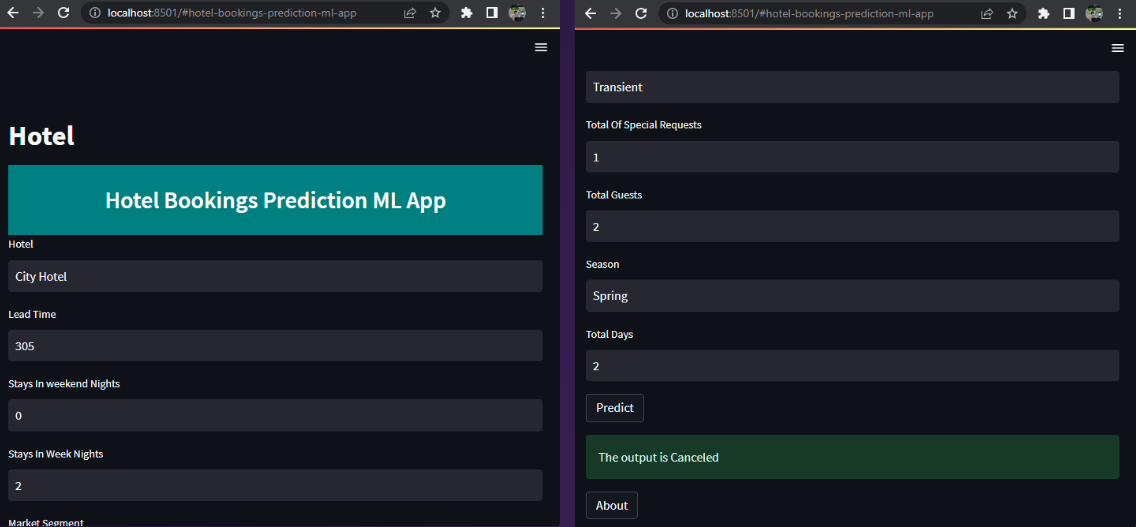

### Thankyou